In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

In [ ]:
### Gretchen - moved from 01_DataCleaning
# Load in datasets
merged_ds2and6_cbp_ind = pd.read_csv('merged_ds2and6_cbp_ind.csv').drop(columns=['Unnamed: 0'])
merged_ds_4and5_loc_to_fips = pd.read_csv('merged_ds_4and5_loc_to_fips.csv').drop(columns=['Unnamed: 0'])
ds6_naics_to_ind = pd.read_csv("DS6_naics2017.txt", sep=',', encoding='latin1') # Default UTF-8 encoding doesn't work
ds6_naics_to_ind.columns = ds6_naics_to_ind.columns.str.lower()
#ds2_cbp = pd.read_csv('DS2_CBP_cbp21co.txt', sep=",", dtype = {'fipstate': 'str', 'fipscty': 'str'})

print(f"DS2&6.shape: {merged_ds2and6_cbp_ind.shape}")
print(merged_ds2and6_cbp_ind.head())
print(f"DS4&5 shape: {merged_ds_4and5_loc_to_fips.shape}")
merged_ds_4and5_loc_to_fips.head()


DS2&6.shape: (41837, 23)
    naics            description  fipscode emp_nf     emp qp1_nf      qp1  \
0  ------  Total for all sectors      6007      G   60377      G   653208   
1  ------  Total for all sectors      6019      G  276218      G  3212007   
2  ------  Total for all sectors      6025      G   31031      G   310625   
3  ------  Total for all sectors      6029      G  193738      G  2428691   
4  ------  Total for all sectors      6031      G   26017      G   272192   

  ap_nf        ap    est  ... n20_49 n50_99 n100_249 n250_499 n500_999 n1000  \
0     G   2902544   4615  ...    422    120       49       11        N     3   
1     G  14367074  18199  ...   1828    618      257       67       24    16   
2     G   1360697   2584  ...    260     61       26        3        4     N   
3     G  10278457  13731  ...   1435    397      195       48       18     7   
4     G   1219896   1725  ...    194     40       19        8        N     3   

  n1000_1 n1000_2 n1000_3 n1000

,fipscode,County Name,State,Carrier,Locality
0,6007,BUTTE,CA,1112,55
1,6019,FRESNO,CA,1112,56
2,6025,IMPERIAL,CA,1182,71
3,6029,KERN,CA,1112,54
4,6031,KINGS,CA,1112,57


In [ ]:
# Get list of top-level industries
# Filter NAICS data - only keep highest level codes (2 digits followed by 4 hyphens)
pattern = r'([0-9]+)(?=[----])'
ds6_naics_to_ind_top = ds6_naics_to_ind[ds6_naics_to_ind['naics'].str.match(pattern)]
print(ds6_naics_to_ind_top.shape)
#ds6_naics_to_ind_top.to_csv('ds6_naics_to_ind_top.csv')

(20, 2)
/root/venv/lib/python3.9/site-packages/pandas/core/strings/object_array.py:213: FutureWarning: Possible set difference at position 13
  regex = re.compile(pat, flags=flags)


In [ ]:
# Explore DS2 subset containing just counties of interest
#ds2b_cbp_sub = merged_ds2and6_cbp_ind[merged_ds2and6_cbp_ind['fipscode'].isin(merged_ds_4and5_loc_to_fips['fipscode'])]
ds2b_cbp_sub = pd.merge(merged_ds2and6_cbp_ind, merged_ds_4and5_loc_to_fips, on = ['fipscode'])
print(ds2b_cbp_sub.shape)
ds2b_cbp_sub.head(10)

(41837, 27)


,naics,description,fipscode,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,...,n500_999,n1000,n1000_1,n1000_2,n1000_3,n1000_4,County Name,State,Carrier,Locality
0,------,Total for all sectors,6007,G,60377,G,653208,G,2902544,4615,...,N,3,N,N,N,N,BUTTE,CA,1112,55
1,11----,"Agriculture, Forestry, Fishing and Hunting",6007,G,260,H,2757,H,16470,24,...,N,N,N,N,N,N,BUTTE,CA,1112,55
2,113///,Forestry and Logging,6007,G,26,G,267,G,2218,6,...,N,N,N,N,N,N,BUTTE,CA,1112,55
3,1133//,Logging,6007,G,26,G,267,G,2218,6,...,N,N,N,N,N,N,BUTTE,CA,1112,55
4,11331/,Logging,6007,G,26,G,267,G,2218,6,...,N,N,N,N,N,N,BUTTE,CA,1112,55
5,113310,Logging,6007,G,26,G,267,G,2218,6,...,N,N,N,N,N,N,BUTTE,CA,1112,55
6,115///,Support Activities for Agriculture and Forestry,6007,H,231,H,2474,H,14186,17,...,N,N,N,N,N,N,BUTTE,CA,1112,55
7,1151//,Support Activities for Crop Production,6007,G,180,G,1722,G,8094,15,...,N,N,N,N,N,N,BUTTE,CA,1112,55
8,11511/,Support Activities for Crop Production,6007,G,180,G,1722,G,8094,15,...,N,N,N,N,N,N,BUTTE,CA,1112,55
9,115112,"Soil Preparation, Planting, and Cultivating",6007,J,44,G,597,G,2620,6,...,N,N,N,N,N,N,BUTTE,CA,1112,55


In [ ]:
# Look at overall # employees for all counties
ds2b_cbp_sub_tot_emp = ds2b_cbp_sub[ds2b_cbp_sub['naics']=='------']
ds2b_cbp_sub_tot_emp = ds2b_cbp_sub_tot_emp.loc[:,['fipscode', 'County Name', 'State', 'emp']]
print(ds2b_cbp_sub_tot_emp.shape)
ds2b_cbp_sub_tot_emp.sort_values(by='emp', ascending=False, inplace=True)
ds2b_cbp_sub_tot_emp

(37, 4)


,fipscode,County Name,State,emp
4231,6037,LOS ANGELES,CA,3629082
28224,17031,COOK,IL,2292825
34730,48201,HARRIS,TX,1980428
32198,48113,DALLAS,TX,1506838
10082,6059,ORANGE,CA,1454905
12143,6073,SAN DIEGO,CA,1249426
40251,53033,KING,WA,1210954
19576,6085,SANTA CLARA,CA,1057178
37331,48439,TARRANT,TX,798353
13772,6075,SAN FRANCISCO,CA,636745


In [ ]:
# Subset for top-level industries
# Filter NAICS data - only keep highest level codes (2 digits followed by 4 hyphens)
pattern = r'([0-9]+)(?=[----])'
merged_ds2and6_cbp_ind_top = merged_ds2and6_cbp_ind[merged_ds2and6_cbp_ind['naics'].str.match(pattern)]
print(merged_ds2and6_cbp_ind_top.shape)
merged_ds2and6_cbp_ind_top.head()
# calculating by industry the percentage of employee per county

# GL: Use groupby.transform to add column with total employees and companies per county --> get percent

(729, 23)


,naics,description,fipscode,emp_nf,emp,qp1_nf,qp1,ap_nf,ap,est,...,n20_49,n50_99,n100_249,n250_499,n500_999,n1000,n1000_1,n1000_2,n1000_3,n1000_4
37,11----,"Agriculture, Forestry, Fishing and Hunting",6007,G,260,H,2757,H,16470,24,...,N,N,N,N,N,N,N,N,N,N
38,11----,"Agriculture, Forestry, Fishing and Hunting",6019,G,2347,G,26247,G,120360,116,...,15,5,4,N,N,N,N,N,N,N
39,11----,"Agriculture, Forestry, Fishing and Hunting",6025,G,443,G,5161,G,22012,33,...,6,N,N,N,N,N,N,N,N,N
40,11----,"Agriculture, Forestry, Fishing and Hunting",6029,H,4327,H,52057,H,196108,63,...,3,3,3,N,N,N,N,N,N,N
41,11----,"Agriculture, Forestry, Fishing and Hunting",6031,G,223,G,3075,G,15671,29,...,N,N,N,N,N,N,N,N,N,N


In [ ]:
# Group by top level industry and county
    # Ideally want to calculate % of each industry within each county
ds2c_cbp_grp = merged_ds2and6_cbp_ind_top.pivot_table(values='emp', index='County Name', columns='description')
print(ds2c_cbp_grp.shape)
ds2c_cbp_grp

KeyError: 'County Name'

In [ ]:
### Load CHR dataset, subset to measures of interest
ds1_chr = pd.read_csv("DS1_CHR_analytic_data2021.csv", header=1)
# Drop unused/duplicated columns
ds1_chr = ds1_chr.drop(columns=["statecode", "countycode", "state", "county", "year"])
# Keep first few columns describing location - any columns with underscore
ds1_chr_loc = ds1_chr.filter(regex=r"^(?!.*_).*$")
# Extract columns containing _rawvalue and _other_data
    # Manually identified subset of metrics to examine from County Health Rankings (dataset 1)
metrics_to_keep = ["v036", "v042", "v011", "v133", "v049", "v085", "v004", "v088", 
                   "v062", "v005", "v023", "v125", "v124", "v136", "v147", "v144", "v145", "v060", 
                   "v139", "v083", "v131", "v156", "v153", "v154", "v166", "v051", "v052", 
                   "v053", "v058"]
metrics_to_keep = [s+"_rawvalue" for s in metrics_to_keep] + ["v136_other_data_"+str(n) for n in range(1,4)]
ds1_chr_rawcols = ds1_chr.filter(regex=r"_raw|_other_data_\d$")
ds1_chr_rawcols = ds1_chr_rawcols.filter(items=metrics_to_keep)
# Merge on indices
ds1_chr = pd.merge(ds1_chr_loc, ds1_chr_rawcols, left_index=True, right_index=True)

del(ds1_chr_loc, ds1_chr_rawcols)
print(f"ds1_chr shape: {ds1_chr.shape}")
#print(ds1_chr.head())

# Load original DS2 without county subsetting
ds2_cbp = pd.read_csv('to_delete_ds2_cbp.csv').drop(columns=['Unnamed: 0'])
print(f"ds2_cbp.shape: {ds2_cbp.shape}")
#print(ds2_cbp.head())

# Merge CHR with DS 2/6
merged_ds2and6_cbp_ind_all = pd.merge(ds6_naics_to_ind, ds2_cbp, on='naics')
# Subset for top-level industries
    # Filter NAICS data - only keep highest level codes (2 digits followed by 4 hyphens)
pattern = r'([0-9]+)(?=[----])'
merged_ds2and6_cbp_ind_all = merged_ds2and6_cbp_ind_all[merged_ds2and6_cbp_ind_all['naics'].str.match(pattern)]
print(f"ds2_6_top shape {merged_ds2and6_cbp_ind_all.shape}")
#print(merged_ds2and6_cbp_ind_all.head())

# Get % employees and companies per industry per county - look at distribution (boxplot, describe)
    # Get total employees per industry - groupby fipscode, sum up emp --> add as new column
    # Divide emp by tot_emp to get % employees per industry per county
    # Pivot table: columns = description, rows = fipscode, values = emp_perc
tot_emp = merged_ds2and6_cbp_ind_all.groupby('fipscode')['emp'].transform('sum').rename('tot_emp')
#print(tot_emp.shape)
#print(tot_emp.head())
merged_ds2and6_cbp_ind_all = merged_ds2and6_cbp_ind_all.merge(tot_emp, left_index=True, right_index=True)
merged_ds2and6_cbp_ind_all['emp_perc'] = merged_ds2and6_cbp_ind_all['emp']/merged_ds2and6_cbp_ind_all['tot_emp']
print(f"ds2_6_top shape {merged_ds2and6_cbp_ind_all.shape}")
#print(merged_ds2and6_cbp_ind_all.head())
emp_ind_pivot = (merged_ds2and6_cbp_ind_all.pivot_table(values='emp_perc', index='fipscode', columns='description')
                    .fillna(0))
print(emp_ind_pivot.shape)
#print(emp_ind_pivot.head())
emp_ind_pivot.describe()

ds1_chr shape: (3194, 33)
ds2_cbp.shape: (1090164, 22)
ds2_6_top shape (50425, 23)
ds2_6_top shape (50425, 25)
(3185, 20)


description,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Agriculture, Forestry, Fishing and Hunting","Arts, Entertainment, and Recreation",Construction,Educational Services,Finance and Insurance,Health Care and Social Assistance,Industries not classified,Information,Management of Companies and Enterprises,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction",Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade
count,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000,3185.000000
mean,0.110461,0.045625,0.006700,0.012047,0.062207,0.012989,0.038182,0.176898,0.000064,0.011955,0.007360,0.148617,0.014822,0.045643,0.036760,0.010707,0.162518,0.044153,0.008353,0.043941
std,0.068118,0.084579,0.024507,0.025182,0.051682,0.028276,0.029709,0.090814,0.000344,0.015724,0.018639,0.128495,0.054621,0.033132,0.041059,0.011617,0.069200,0.050675,0.027850,0.043151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074878,0.014206,0.000000,0.001438,0.035100,0.000000,0.021960,0.122176,0.000000,0.004169,0.000000,0.048533,0.000000,0.033136,0.017663,0.004238,0.128571,0.017101,0.000000,0.019110
50%,0.101140,0.031212,0.000375,0.007409,0.052431,0.004011,0.030741,0.168663,0.000000,0.008318,0.000000,0.118006,0.000000,0.041933,0.027175,0.008528,0.156911,0.030754,0.002186,0.034500
75%,0.130786,0.053619,0.004128,0.014218,0.075894,0.014657,0.045736,0.219429,0.000000,0.014557,0.006791,0.221168,0.003002,0.052225,0.042373,0.014152,0.188658,0.053708,0.007410,0.055383
max,1.000000,0.937852,0.546078,0.623967,1.000000,0.456700,0.444444,1.000000,0.008531,0.299807,0.379071,0.909688,0.913251,1.000000,0.785714,0.252525,1.000000,1.000000,0.654731,0.727273


[Text(0, 0, 'Agriculture, Forestry, Fishing and Hunting'),
 Text(1, 0, 'Mining, Quarrying, and Oil and Gas Extraction'),
 Text(2, 0, 'Utilities'),
 Text(3, 0, 'Construction'),
 Text(4, 0, 'Manufacturing'),
 Text(5, 0, 'Wholesale Trade'),
 Text(6, 0, 'Retail Trade'),
 Text(7, 0, 'Transportation and Warehousing'),
 Text(8, 0, 'Information'),
 Text(9, 0, 'Finance and Insurance'),
 Text(10, 0, 'Real Estate and Rental and Leasing'),
 Text(11, 0, 'Professional, Scientific, and Technical Services'),
 Text(12, 0, 'Management of Companies and Enterprises'),
 Text(13, 0, 'Administrative and Support and Waste Management and Remediation Services'),
 Text(14, 0, 'Educational Services'),
 Text(15, 0, 'Health Care and Social Assistance'),
 Text(16, 0, 'Arts, Entertainment, and Recreation'),
 Text(17, 0, 'Accommodation and Food Services'),
 Text(18, 0, 'Other Services (except Public Administration)'),
 Text(19, 0, 'Industries not classified')]

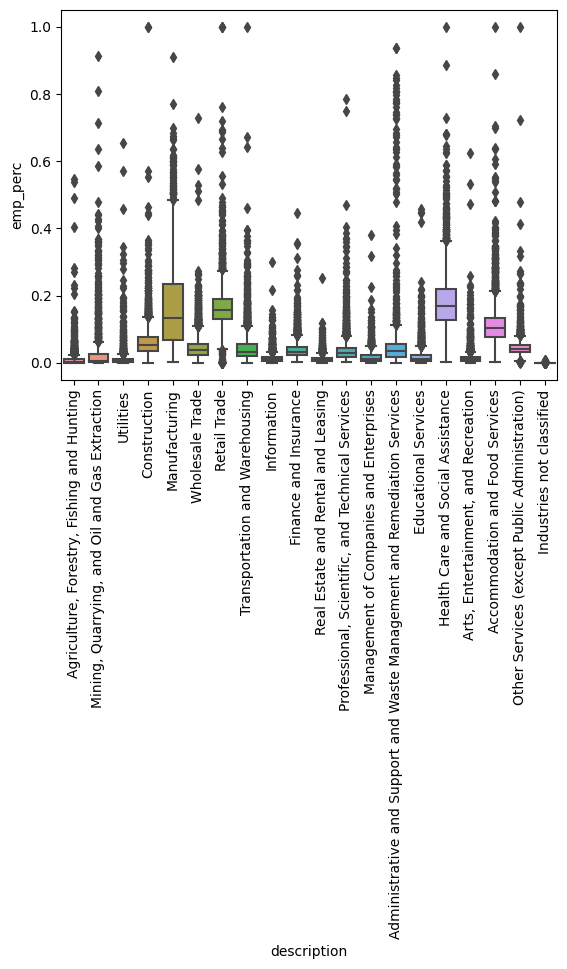

In [ ]:
my_plot = sns.boxplot(merged_ds2and6_cbp_ind_all, x='description', y='emp_perc')
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90);

In [ ]:
# Plot same graph for single county localities only

ds2_6_counties = merged_ds2and6_cbp_ind_all[merged_ds2and6_cbp_ind_all['fipscode'].isin(merged_ds_4and5_loc_to_fips['fipscode'])]
print(ds2_6_counties.shape)
#ds2_6_counties.head()

emp_ind_counties_pivot = (ds2_6_counties.pivot_table(values='emp_perc', index='fipscode', columns='description')
                    .fillna(0))
print(emp_ind_counties_pivot.shape)
#print(emp_ind_counties_pivot.head())
emp_ind_counties_pivot.describe()

(729, 25)
(37, 20)


description,Accommodation and Food Services,Administrative and Support and Waste Management and Remediation Services,"Agriculture, Forestry, Fishing and Hunting","Arts, Entertainment, and Recreation",Construction,Educational Services,Finance and Insurance,Health Care and Social Assistance,Industries not classified,Information,Management of Companies and Enterprises,Manufacturing,"Mining, Quarrying, and Oil and Gas Extraction",Other Services (except Public Administration),"Professional, Scientific, and Technical Services",Real Estate and Rental and Leasing,Retail Trade,Transportation and Warehousing,Utilities,Wholesale Trade
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,0.112702,0.057762,0.007468,0.013395,0.068956,0.020952,0.038724,0.165798,0.000113,0.033360,0.020556,0.095233,0.002774,0.039065,0.068115,0.019244,0.137824,0.046084,0.004715,0.047161
std,0.028837,0.012944,0.012937,0.005969,0.022717,0.010573,0.018852,0.041383,0.000093,0.046563,0.020395,0.051514,0.006037,0.008813,0.043236,0.005225,0.039741,0.029075,0.003906,0.013172
min,0.064752,0.019730,0.000000,0.004970,0.030576,0.005728,0.015114,0.091676,0.000000,0.003886,0.000000,0.010276,0.000000,0.023442,0.017563,0.009716,0.065813,0.013611,0.000000,0.021529
25%,0.101392,0.053435,0.000202,0.009268,0.058524,0.013167,0.024962,0.138402,0.000060,0.008993,0.006530,0.064210,0.000151,0.033333,0.036829,0.014584,0.106194,0.025870,0.002196,0.037436
50%,0.108503,0.058067,0.001871,0.012377,0.065096,0.020628,0.033137,0.163318,0.000093,0.013614,0.015580,0.083832,0.000599,0.039296,0.051886,0.018894,0.142026,0.036997,0.003296,0.046458
75%,0.124432,0.063705,0.008547,0.015312,0.075202,0.025683,0.047677,0.184596,0.000145,0.029553,0.025632,0.127598,0.002408,0.044507,0.090651,0.022779,0.164259,0.061150,0.006314,0.057599
max,0.193022,0.093680,0.066730,0.035654,0.138712,0.050309,0.094025,0.297189,0.000398,0.218105,0.088144,0.260687,0.032208,0.058700,0.198805,0.030148,0.256816,0.153152,0.018543,0.070082


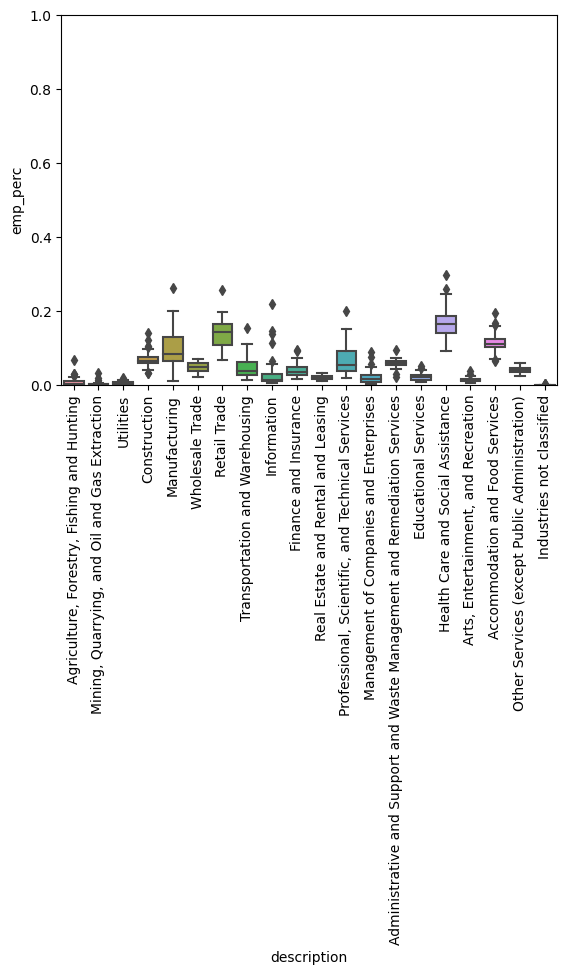

In [ ]:
my_plot2 = sns.boxplot(ds2_6_counties, x='description', y='emp_perc')
my_plot2.set_xticklabels(my_plot.get_xticklabels(), rotation=90);
my_plot2.set_ylim(bottom=0, top=1);

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=935c12df-95fc-47b5-a033-2935b9193bd3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>